# Lending Club Case Study
### Objective:
This company is the largest online loan marketplace and wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

##### Analysis performed by:
- Aditya Bhave
- ShivaPrasad T

In [1]:
# Load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import median

from  matplotlib.ticker import PercentFormatter

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# Read the Data (Note - dtype is provided to avoid low memory warning)
df = pd.read_csv('./loan.csv', dtype={'next_pymnt_d': str})

# Data Understanding

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
print('Columns Count: ', len(df.columns))
print(df.nunique())

Columns Count:  111
id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                 

#### Observations
- Dataset contains 111 columns
- Dataset contains mixture of Categorical and Continuous columns (variables)
- Some columns are having lot of null values
- Some columns are having only one value for all rows

# Data Cleaning and Manipulation
##### 1. Data quality issues

In [5]:
# Check if there are all Null columns
print(round(100*(df.isnull().sum()/len(df.index)), 2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [6]:
# There are some columns with all null, some with more than 90 % values null
# These columns are not useful for our analysis
all_na = (round(100*(df.isnull().sum()/len(df.index)), 2) == 100)
print('Count of columns having all values null = ', all_na[all_na].index.size)

Count of columns having all values null =  54


In [7]:
# Remove all null columns
df.dropna(how = 'all', axis = 1, inplace = True)
# Remove all null rows
df.dropna(how='all', inplace=True)
print('Shape of DataFrame after removing nulls:', df.shape)

Shape of DataFrame after removing nulls: (39717, 57)


In [8]:
# find columns where most of the records are null (60% or more)
most_empty = round(100*(df.isnull().sum()/len(df.index)), 2)
most_empty_columns = most_empty[most_empty >= 60].index.tolist()
print('Columns with 60% or more null values: ', most_empty_columns)

Columns with 60% or more null values:  ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [9]:
df.drop(columns = most_empty_columns, axis=1, inplace = True)
print('Shape of DataFrame after removing nulls:', df.shape)

Shape of DataFrame after removing nulls: (39717, 54)


In [10]:
one_value_cols = df.nunique()[df.nunique() == 1].index
print('Columns where only 1 value is present: ', one_value_cols)
# These columns are not useful
df.drop(columns = one_value_cols, axis = 1, inplace = True)
print('Shape of DataFrame after removing nulls:', df.shape)

Columns where only 1 value is present:  Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')
Shape of DataFrame after removing nulls: (39717, 45)


In [11]:
columns_to_drop = ['member_id', 'url', 'desc', 'zip_code', 'total_rec_int', 'last_pymnt_d',
                   'last_pymnt_amnt', 'revol_bal', 'last_credit_pull_d', 'installment', 
                   'emp_title', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee',
                   'recoveries', 'collection_recovery_fee'
                  ]
# member_id - this column lists the member ids on file. We are not analysing the individual members
# url - is the url of the report which has no significance in the analysis
# desc - is text which defines purpose of the loan, we already have a purpose column
# zip_code - is the zip code and has no significance in the analysis
# total_rec_int - is total received interest. Which shows profit but we are not analyzing profit.

# mths_since_last_delinq - is having 64% of records null
# last_pymnt_d - is last month when payment was recieved. Does not look significant for our analysis. We can use status column
# last_pymnt_amnt - is last amount which was paid. Does not look dignificant for our analysis
# revol_bal - does not make sense since it is the actual amount. We already have revolving utilization
# last_credit_pull_d - the dates are after loan was issued. So not significant for our analysis

# int_rate - ??????? *** TODO ***
# installment - installment depends on sub-grade and loan amount. We are already considering the later columns
# emp_title - random text values which does not look relevant for our analysis
# out_prncp - this column represents how much outstanding principal is remaining. Not relevant for our analysis
# out_prncp_inv - this column represents how much outstanding principal of investor is remaining. Not relevant for our analysis
# total_rec_late_fee - Late fees received, not relevant for our analysis
# recoveries - Post charged off gross recovery, not relevant
# collection_recovery_fee - Not relevant
# collections_12_mths_ex_med - Not relevant
# chargeoff_within_12_mths - values are either 0 or null
# tax_liens - values are either 0 or nulls


# based on above observations lets drop the columns
df.drop(columns = columns_to_drop, axis=1, inplace = True)
print('Shape of DataFrame :', df.shape)

Shape of DataFrame : (39717, 29)


In [12]:
# total_pymnt_inv - is having 97% +ve correlation with 'total_pymnt'
# total_rec_prncp - is having 97% +ve correlation with 'total_pymnt'. 
print('Corr between total_pymnt and total_pymnt_inv', df.total_pymnt_inv.corr(df.total_pymnt))
print('Corr between total_pymnt and total_rec_prncp', df.total_rec_prncp.corr(df.total_pymnt))

# funded_amnt_inv - is having 94% +ve correlation with 'loan_amnt'
# funded_amnt - is having 98% +ve correlation with 'loan_amnt'
print('Corr between loan_amnt and funded_amnt_inv', df.loan_amnt.corr(df.funded_amnt_inv))
print('Corr between loan_amnt and funded_amnt', df.loan_amnt.corr(df.funded_amnt))

# pub_rec - is having 84% +ve correlation with 'pub_recc_bankruptcies'
print('Corr between pub_rec_bankruptcies and pub_rec', df.pub_rec_bankruptcies.corr(df.pub_rec))

# pub_rec_bankruptcies - this column has most 0s
columns_to_drop = ['total_pymnt_inv', 'total_rec_prncp', 'funded_amnt_inv', 'funded_amnt', 'pub_rec', 'pub_rec_bankruptcies']

df.drop(columns = columns_to_drop, axis = 1, inplace = True)
print('Shape of DataFrame :', df.shape)

Corr between total_pymnt and total_pymnt_inv 0.9708145208132954
Corr between total_pymnt and total_rec_prncp 0.9714721281075244
Corr between loan_amnt and funded_amnt_inv 0.9400335348163549
Corr between loan_amnt and funded_amnt 0.9815782188237627
Corr between pub_rec_bankruptcies and pub_rec 0.8473050197507597
Shape of DataFrame : (39717, 23)


In [13]:
# title is having descriptive inromation of the loan requirement which is already categorized in purpose
df.loc[:, ['title', 'purpose']]
# removing title column
df.drop('title', axis = 1, inplace = True)
print('Shape of DataFrame :', df.shape)

Shape of DataFrame : (39717, 22)


##### 2. Converting Data to suitable format

In [14]:
# emp_length to contain numbers. removing extra characters
# convert to numeric column
df.emp_length = pd.to_numeric(df.emp_length.str.replace(r'[+< years]', ''), errors = 'coerce')

# term should be numeric
df.term = pd.to_numeric(df.term.str.replace(' months', ''))

# issue_d should be converted to date
df.issue_d = pd.to_datetime('1-' + df.issue_d)

# earliest_cr_line should be converted to date
df.earliest_cr_line = pd.to_datetime('1-' + df.earliest_cr_line)

# int_rate and revolv_util should be numeric columns
df.int_rate = pd.to_numeric(df.int_rate.str.replace('%', ''))
df.revol_util = pd.to_numeric(df.revol_util.str.replace('%', ''))

In [15]:
# some data issues are observed in earliest_cr_line
print('earliest_cr_line column')
print('Min Year : ', (df.earliest_cr_line.dt.year).min())
print('Max Year : ', (df.earliest_cr_line.dt.year).max())

# As per information data is between 2007 to 2011. So year after 2011 is not possible
# So years greater than 2011 are probably year in 19th century instead of 20th
# This may not be an issue in source data.
# We did some research and observed that pandas adds century as 20 incorrectly and in our data its since 2046
print('Number of incorrect values: ', (df.earliest_cr_line.dt.year > 2045).sum())

# so wherever year > 245, lets replace with year - 100 (i.e. 2069 will become 1969)
df.earliest_cr_line = df.earliest_cr_line.apply(lambda d: d - np.timedelta64(100, 'Y') if (d.year > 2045) else d)

print('After Correcting')
print('Min Year : ', (df.earliest_cr_line.dt.year).min())
print('Max Year : ', (df.earliest_cr_line.dt.year).max())

earliest_cr_line column
Min Year :  1970
Max Year :  2069
Number of incorrect values:  127
After Correcting
Min Year :  1946
Max Year :  2008


In [16]:
# Lets create column length_of_records which shows since how many years the person had account (or history)
# 'Length of oldest account' is one of the factors credit rating agencies consider
df.loc[:, 'length_of_account'] = round((df.issue_d - df.earliest_cr_line) / np.timedelta64(1, 'Y'))

In [17]:
# Current loans do not have any result (i.e. Charged Off or Fuly paid). Lets remove rows with Loan Status = Current 
df = df[~df.loan_status.isin(['Current'])]

In [18]:
# Lets create a new column which will show whether the loan resulted into defaulter or not
# This will be a boolean column which will make it wasy to sum and find percentages
df.loc[:, 'defaulter'] = (df.loan_status == 'Charged Off')

In [19]:
# End of Data Cleaning and Manipulation
# Here is head of Dataframe
df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt,length_of_account,defaulter
0,1077501,5000,36,10.65,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,83.7,9,5863.155187,27.0,False
1,1077430,2500,60,15.27,C,C4,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,9.4,4,1008.710000,13.0,True
2,1077175,2400,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,98.5,10,3005.666844,10.0,False
3,1076863,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,21.0,37,12231.890000,16.0,False
5,1075269,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,28.3,12,5632.210000,7.0,False


In [20]:
# Functions which are re-used for analysis

# Find Percentage of count within categorical col
def find_prcnt_within_category(data, col):
    percent_count = df.groupby(col).id.count().sort_values(ascending = False)
    
    return percent_count

# Plot a bar plot of Series with index on x-axis and values on y-axis. Also draws numbers on the graph
def bar_plt_series(series, display_values = True):
    plt = sns.barplot(x=series.index, y=series.values, order = series.index)
    
    # For displaying values in bar plot
    if display_values == True:
        for i, item in series.reset_index(drop = True).sort_values(ascending = False).iteritems():
            plt.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")

    return plt

# def find_defaulter_prcnt_within_category(data, col):
#     percent_count = df.groupby(col).id.count().sort_values(ascending = False)
    
#     return percent_count

def plot_defaulter_percentage_graph(data, col, defaulter = True, rotate_x_ticks = False, x_line = 0):
    plot_percentage = round(data[data.defaulter == defaulter].groupby(col).id.count()/data.groupby(col).id.count()*100, 2)
    
    if (x_line > 0): 
        plt.axhline(y = x_line)
    
    if (rotate_x_ticks):
        plt.xticks(rotation = 90)
    
    sns.barplot(x = plot_percentage.index, y = plot_percentage.values, order = plot_percentage.sort_values(ascending=False).index)

    

# Univariate, Segmented Univariate and Bi-variate Analysis
---

In [21]:
df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt,length_of_account,defaulter
0,1077501,5000,36,10.65,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,83.7,9,5863.155187,27.0,False
1,1077430,2500,60,15.27,C,C4,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,9.4,4,1008.710000,13.0,True
2,1077175,2400,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,98.5,10,3005.666844,10.0,False
3,1076863,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,21.0,37,12231.890000,16.0,False
5,1075269,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,28.3,12,5632.210000,7.0,False


## Loan Amount
- Definition : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- Type: Continous

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
10%       3090.000000
20%       5000.000000
30%       6000.000000
40%       7750.000000
50%       9600.000000
60%      11200.000000
70%      14000.000000
80%      16000.000000
90%      21600.000000
max      35000.000000
Name: loan_amnt, dtype: float64


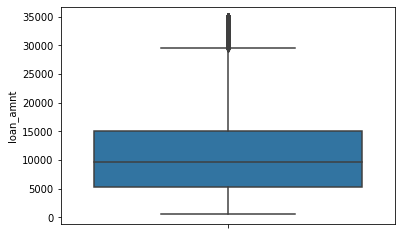

In [22]:
print(df.loan_amnt.describe(percentiles=[.10, .20, .30, .40, .50, .60, .70, .80, .90]))
# checking the distribution of loan_amnt
sns.boxplot(y=df.loan_amnt)
plt.show()

# A new derived metric to make the analysis simpler
df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'K' for x in range (0, 35, 5)])

loan_amnt_bucket_count = df.groupby('loan_amnt_bucket').id.count().sort_values(ascending = False)

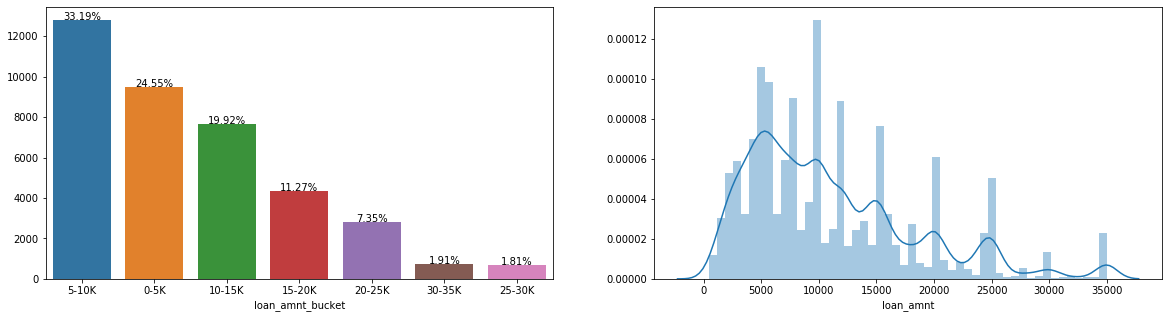

In [23]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
plt.subplot(121)
plt_loan_amnt_bucket = sns.barplot(x=loan_amnt_bucket_count.index, y=loan_amnt_bucket_count.values, order = loan_amnt_bucket_count.index)

# For displaying values in bar plot
for i, item in loan_amnt_bucket_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_loan_amnt_bucket.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")


#from the graph, it looks like relatively higher number of loans were issued in rounded figures such as 5000, 10000, 12000, 15000, 20000, 25000, 30000 and 35000
# also, don't see outliers, mean and median are comparable.
plt.subplot(122)
sns.distplot(df.loan_amnt)

plt.show()

<Figure size 1440x720 with 0 Axes>

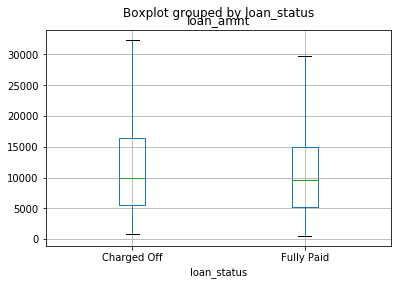

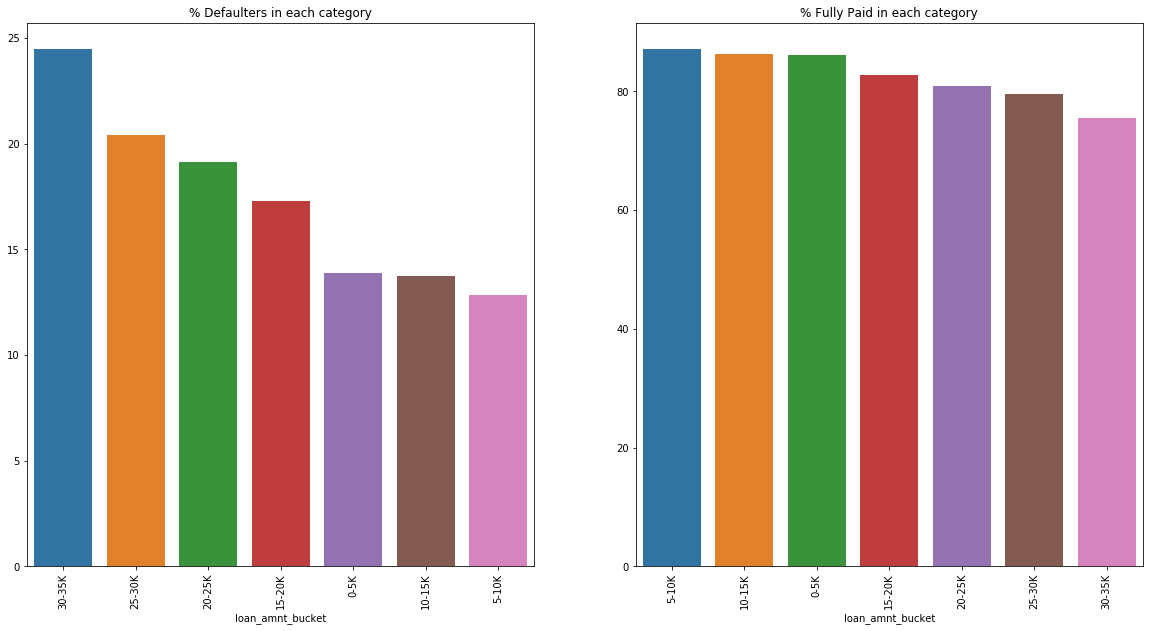

In [31]:
plt.figure(figsize = (20,10))
df.boxplot(column='loan_amnt', by='loan_status', showfliers=False)
# No significant info in box plot

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.title('% Defaulters in each category')
plt.xticks(rotation = 90)
plot_defaulter_percentage_graph(df, 'loan_amnt_bucket', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.title('% Fully Paid in each category')
plot_defaulter_percentage_graph(df, 'loan_amnt_bucket', rotate_x_ticks = True, defaulter = False)
plt.show()

### Observations
- Almost 75% of the loans were below 15,000; Most of the loans (32%) fall in the range 5-10K.
- Relatively higher number of loans were issued in rounded figures such as 5000, 10000, 12000, 15000, 20000, 25000, 30000 and 35000.
- Not many outliers.
- Higher the loan amount higher the risk of loan getting defaulted. Also, risk is gradually increasing as the loan amount increases.
- Bank has to reduce giving big loans as it carry high risk.

## Term
- Definition : The number of payments on the loan. Values are in months and can be either 36 or 60.
- Type: Categorical

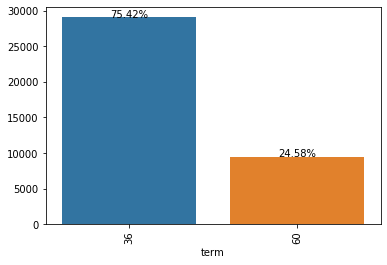

In [36]:
# among all loans, 73.25% of them were short term
df.groupby('term')['id'].count() * 100 / len(df.index)

term_count = df.groupby('term').id.count().sort_values(ascending = False)

plt.xticks(rotation = 90)
plt_term_count = sns.barplot(x=term_count.index, y=term_count.values, order = term_count.index)

# For displaying values in bar plot
for i, item in term_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_term_count.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")
plt.show()

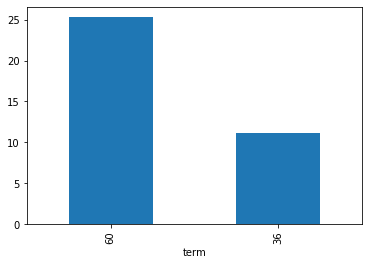

In [39]:
grouped_ls_term = df.groupby(['loan_status', 'term'])['term'].count()
grouped_ls_term = grouped_ls_term.unstack(level=-1)
grouped_term = df.groupby('term')['term'].count()
perc_term = grouped_ls_term * 100 / grouped_term
#perc_term
perc_term.loc["Charged Off"].sort_values(ascending = False).plot.bar()


### Observations:
- Almost 74% of total loans were short term, 36 months
- Almost 25% of long term loans were Charged Off, so it's evident that long term loans are risker
- It's suggested to reduce long term loans as it carry high risk

## Grade
- Description: LC assigned loan grade
- Type: Categorical (Ordered)

In [43]:
df.groupby('grade')['id'].count() * 100/  len(df.index)

grade
A    26.038831
B    30.264147
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: id, dtype: float64

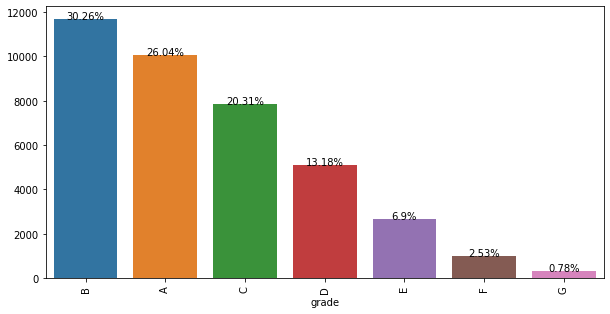

In [45]:
grade_count = df.groupby('grade').id.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
plt_grade_count = sns.barplot(x=grade_count.index, y=grade_count.values, order = grade_count.index)

# For displaying values in bar plot
for i, item in grade_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_grade_count.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")
plt.show()
# we can see that most popular loan is B

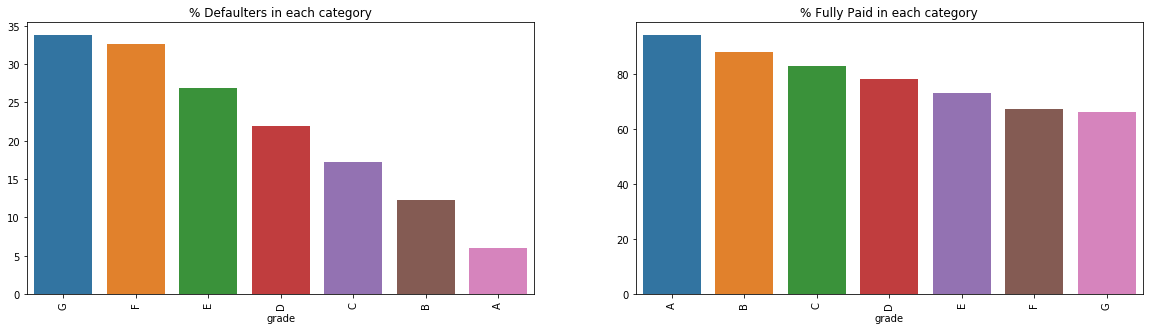

In [48]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('% Defaulters in each category')
plt.xticks(rotation = 90)
plot_defaulter_percentage_graph(df, 'grade', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.title('% Fully Paid in each category')
plot_defaulter_percentage_graph(df, 'grade', rotate_x_ticks = True, defaulter = False)
plt.show()

### Observations:
- Top 3 popular loan grades are B, A and C
- Almost 30% of the loans are grade B
- It seems that lower grade loans such as G, F, E are riskier
- On the other hand, A, B and C good loans
- More than 30% of G-grade loans were defaulted and it carries the highest risk.
- It is recommended to stop giving loans with lower grades

## Employment Length
- Description: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- Type: Categorical (Ordered)

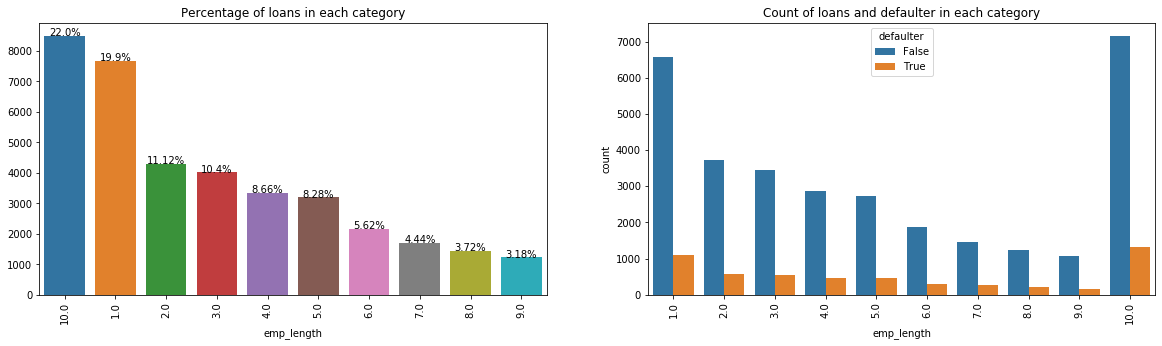

In [51]:
emp_length_count = find_prcnt_within_category(df, 'emp_length')

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of loans in each category')
plt.xticks(rotation = 90)
plt_purpose = bar_plt_series(emp_length_count)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="emp_length", hue="defaulter", data=df)

plt.show()

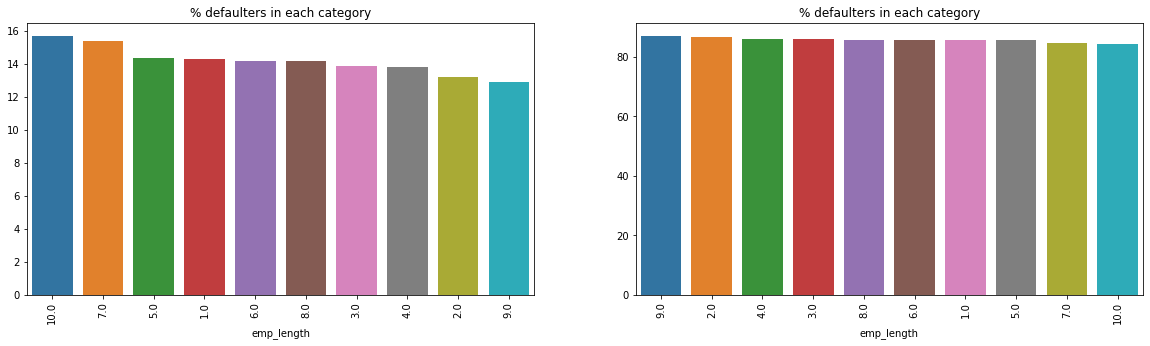

In [53]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'emp_length', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'emp_length', rotate_x_ticks = True, defaulter = False)

### Observations:
- Most of the loans (22%) were issued to people have 10 or more years of experience
- Surprisingly, second largest borrowers (~20%) were the people with 1 or less year of experience.
- No significant impact found on loan status

# Home Ownership
- Description: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- Type: Categorical (Unordered)

In [55]:
# Lets plot a percentage for each category
df.groupby('home_ownership').size() * 100 / len(df.index)

home_ownership
MORTGAGE    44.122145
NONE         0.007777
OTHER        0.254037
OWN          7.711849
RENT        47.904192
dtype: float64

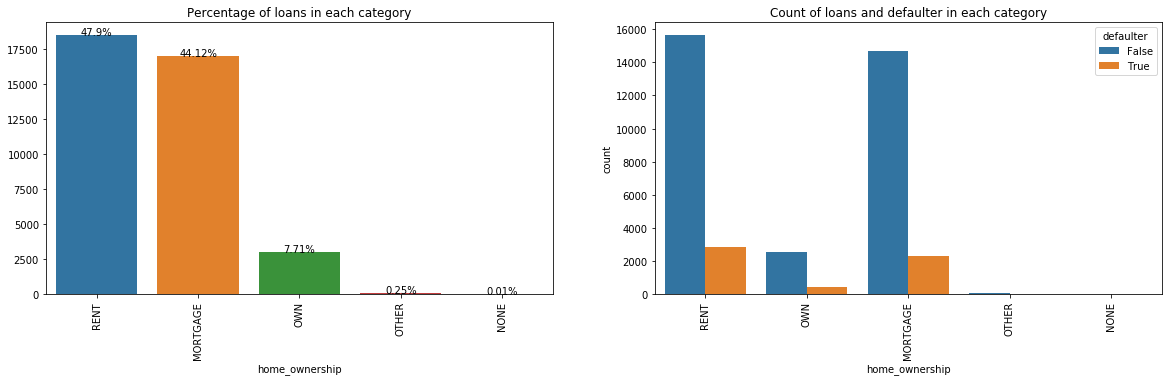

In [58]:
home_ownership_count = find_prcnt_within_category(df, 'home_ownership')

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of loans in each category')
plt.xticks(rotation = 90)
plt_home_ownership = bar_plt_series(home_ownership_count)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="home_ownership", hue="defaulter", data=df)

plt.show()

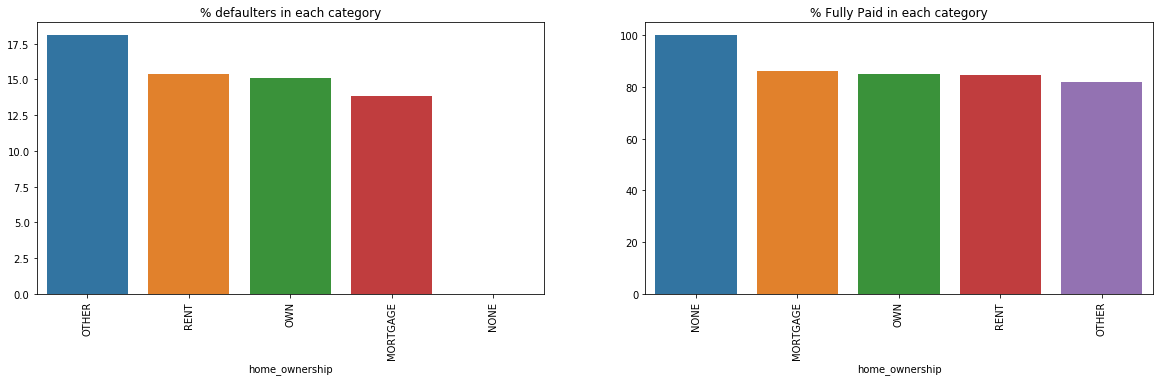

In [105]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'home_ownership', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title('% Fully Paid in each category')
plot_defaulter_percentage_graph(df, 'home_ownership', rotate_x_ticks = True, defaulter = False)

### Obseravations:
- It is clear from the analysis that most of the people who have taken loans have their home on rent or on mortgage.
- They account for almost 92% of the total loans.
- The most risky categoy is 'Others'. Almost 18% of people from this category defaulted their loans.
- It is suggested to stop giving loans to people who belong to 'Other' category. Even though defaulters from other categories are comparable, have caution while giving loans to people who have their home on rent also.

# Annual Income
- Description: The self-reported annual income provided by the borrower during registration.
- Type: Continous

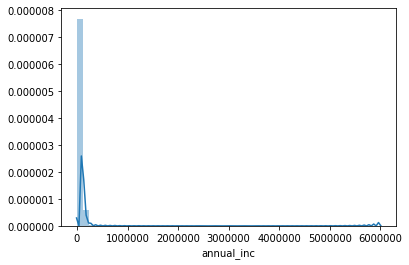

In [62]:
sns.distplot(df.annual_inc)
plt.show()
# From the distribution, we can see it is right skewed.

In [64]:
# potential to segregate into different buckets as we have values mainly from 3 different ranges
df.annual_inc.describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8, .85, .9,.95, .98, .99])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
20%      3.719616e+04
25%      4.000000e+04
30%      4.450000e+04
40%      5.000400e+04
50%      5.886800e+04
60%      6.500400e+04
70%      7.500000e+04
75%      8.200000e+04
80%      9.000000e+04
85%      1.000000e+05
90%      1.150000e+05
95%      1.400040e+05
98%      1.870000e+05
99%      2.341440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

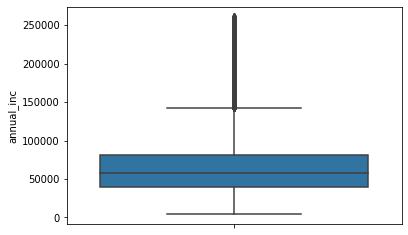

In [66]:
# to check the presence of outliers
sns.boxplot(y=df.annual_inc)
plt.show()

# removing outliers based on the logic:- if a value is greater than or equal to (3 * std) + mean, consider it as outlier
df = df[df.annual_inc <= (3*df.annual_inc.std() + df.annual_inc.mean())]

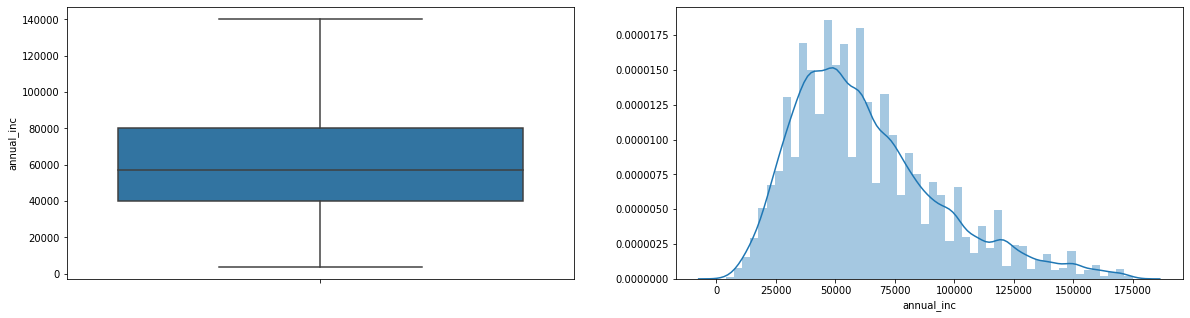

In [70]:
plt.figure(figsize = (20,5))
plt.subplot(121)
sns.boxplot(y=df.annual_inc,  showfliers=False)

plt.subplot(122)
sns.distplot(df.annual_inc)
plt.show()
# from the below plot, it is clear that 75% people have income less than 80,000$

In [72]:
# binning the annual income
df['annual_inc_bucket'] = pd.cut(df['annual_inc'], [x for x in range(0, 200000, 10000)], labels=[str(x)+'-'+str(x+10)+'K' for x in range (0, 190, 10)])
#df_withoutCurrent[['annual_inc', 'annual_inc_bucket']].head(50)

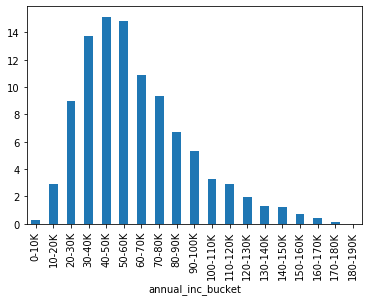

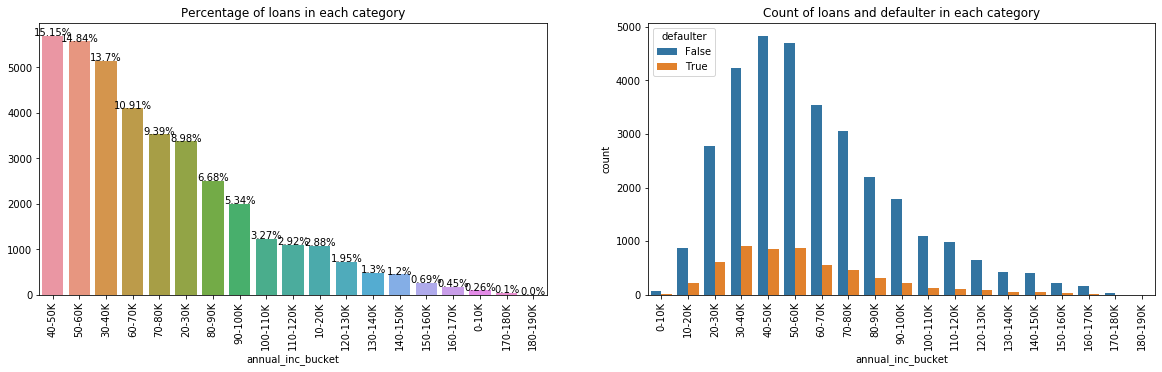

In [106]:
(df.groupby('annual_inc_bucket')['id'].count() * 100/ len(df)).plot.bar()

annual_inc_bucket_count = find_prcnt_within_category(df, 'annual_inc_bucket')

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of loans in each category')
plt.xticks(rotation = 90)
plt_home_ownership = bar_plt_series(annual_inc_bucket_count)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="annual_inc_bucket", hue="defaulter", data=df)

plt.show()

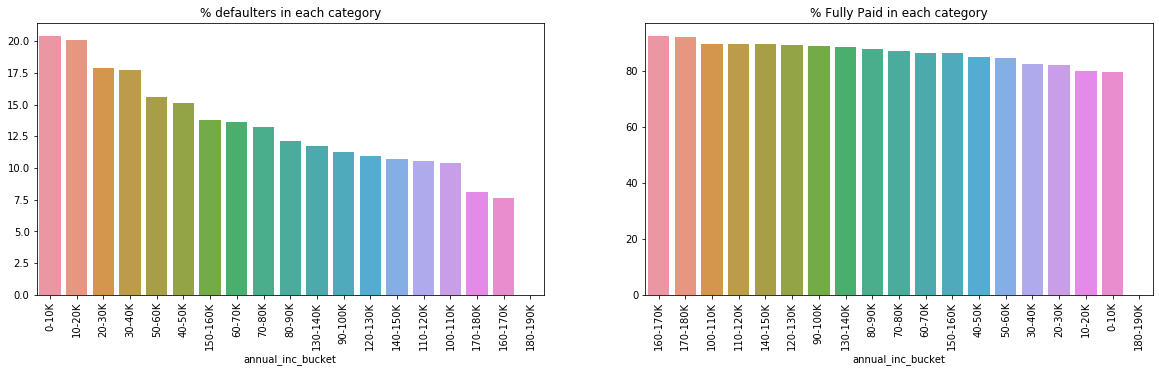

In [77]:
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'annual_inc_bucket', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title('% Fully Paid in each category')
plot_defaulter_percentage_graph(df, 'annual_inc_bucket', rotate_x_ticks = True, defaulter = False)

### Observations:
- The number of loans issued to people with lower income were relatively less.
- 75% of the borrowers had an annual income equal to or lower than 80,000$.
- From the analysis, it looked like people with a lower income are riskier
- Almost 20% of loans were defaulted in the 0-10K and 10-20K category.
- Almost 17.5% of loans were defaulted in the 20-30K and 30-40K category. In these categories, the number of loans issued was significantly higher in 30-40K category.

# Verification Status
- Description: Indicates if income was verified by LC, not verified, or if the income source was verified
- Type: Categorical (Ordered)

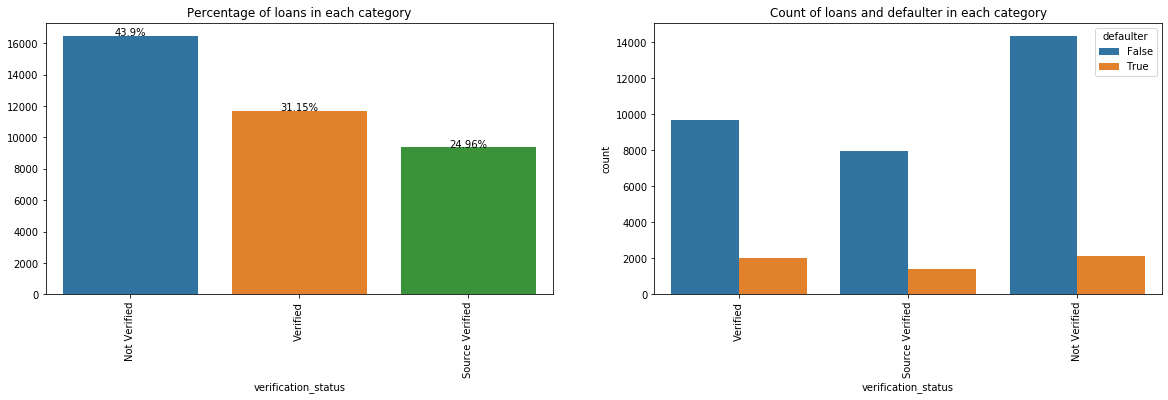

In [82]:
verification_status_count = find_prcnt_within_category(df, 'verification_status')

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of loans in each category')
plt.xticks(rotation = 90)
plt_home_ownership = bar_plt_series(verification_status_count)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="verification_status", hue="defaulter", data=df)

plt.show()

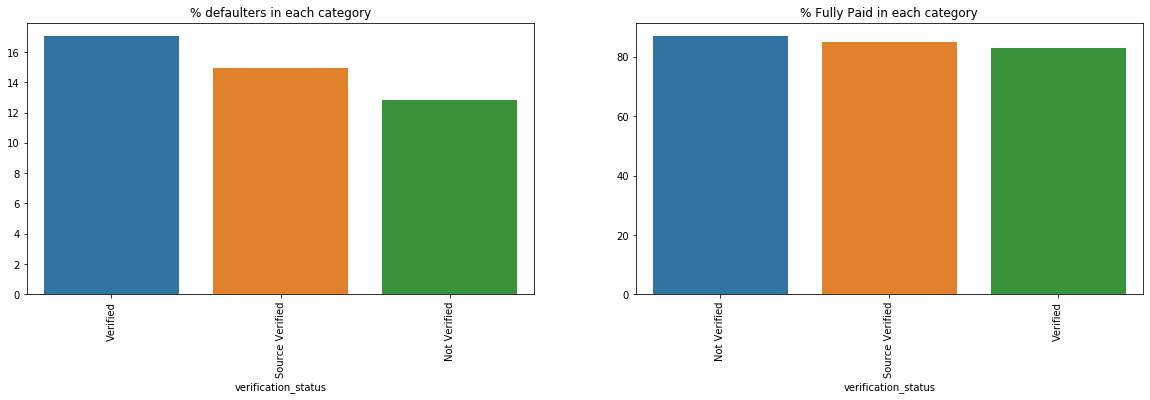

In [84]:
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'verification_status', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title('% Fully Paid in each category')
plot_defaulter_percentage_graph(df, 'verification_status', rotate_x_ticks = True, defaulter = False)

## Observations:
- Most of the loans were issued to the people whose income was 'Not Verified', about 43%
- Ironically, most risky borrowers were those whose income was verified.

## Issue Date
- Description: The month which the loan was funded
- Type: Continuous

In [87]:
df.loc[:, 'issue_year'] = df['issue_d'].dt.year
df.loc[:, 'issue_month'] = df['issue_d'].dt.month

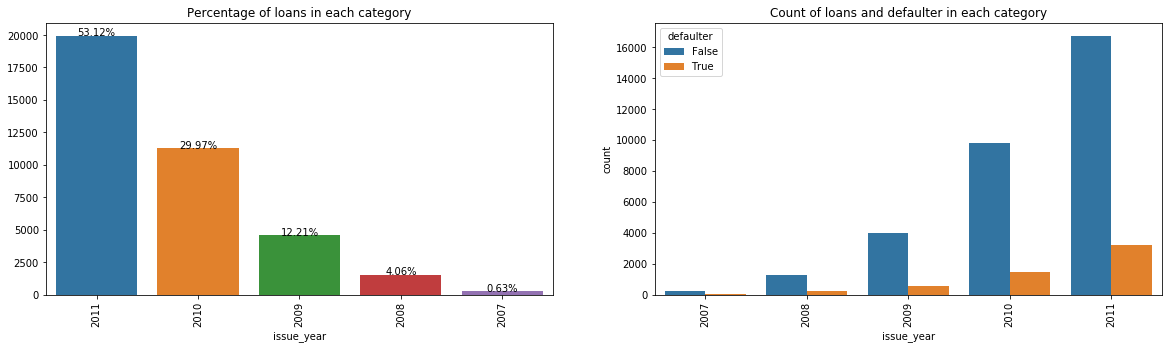

In [89]:
issue_year_count = find_prcnt_within_category(df, 'issue_year')

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of loans in each category')
plt.xticks(rotation = 90)
plt_home_ownership = bar_plt_series(issue_year_count)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="issue_year", hue="defaulter", data=df)

plt.show()

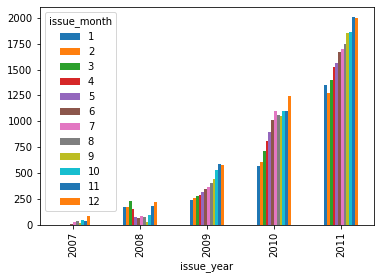

In [92]:
(df.groupby(['issue_year', 'issue_month'])['id'].count()).unstack(level=-1).plot.bar()
plt.show()

In [94]:
# Analysing the impact on loan_status column; 
grouped_ls_year = df.groupby(['loan_status', 'issue_year'])['issue_year'].count()
# changing it to useful shape
grouped_ls_year = grouped_ls_year.unstack(level=-1)
grouped_year = df.groupby('issue_year')['issue_year'].count()
perc_year = grouped_ls_year * 100 / grouped_year
perc_year.loc["Charged Off"].sort_values(ascending = False)

issue_year
2007    17.647059
2011    16.057736
2008    15.868852
2010    12.888613
2009    12.584515
Name: Charged Off, dtype: float64

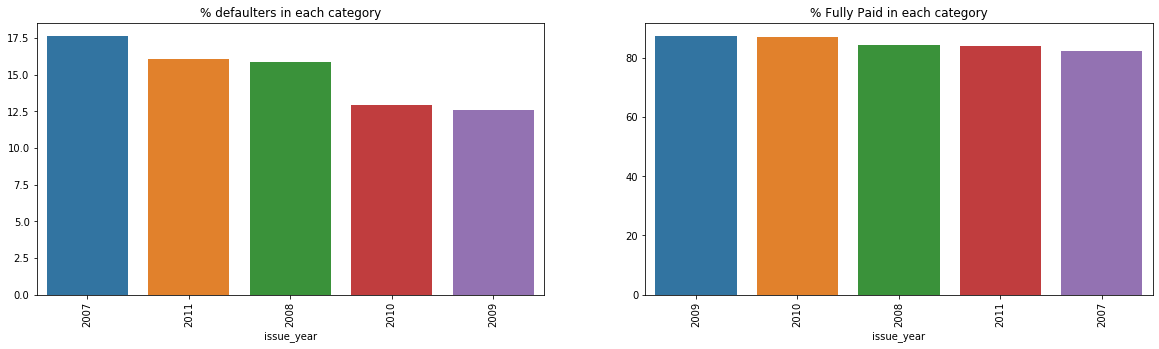

In [96]:
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'issue_year', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title('% Fully Paid in each category')
plot_defaulter_percentage_graph(df, 'issue_year', rotate_x_ticks = True, defaulter = False)

### Observations
- Most number of loans were issued in the year 2011.
- There was a gradual increase in the number of loans issued over the years
- The number of loans were gradually rising from Jan-Dec in almost all the years.
- December has witnessed the most number of loan issual.
- From the analysis, this variable has no significant impact on the loan status

## Loan Status
- Description: Current status of the loan
- Type: Categorical

In [101]:
# almost 14.16% loans were defaulted.
df.groupby('loan_status')['id'].count()

loan_status
Charged Off     5516
Fully Paid     32043
Name: id, dtype: int64

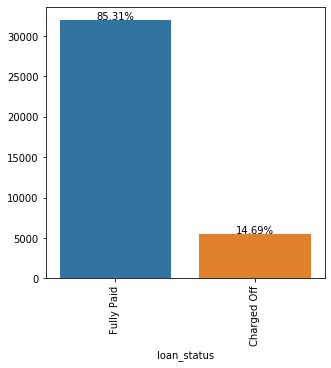

In [104]:
loanstatus_count = df.groupby('loan_status').id.count().sort_values(ascending = False)

plt.figure(figsize = (5,5))
plt.xticks(rotation = 90)
plt_loanstatus_count = sns.barplot(x=loanstatus_count.index, y=loanstatus_count.values, order = loanstatus_count.index)

# For displaying values in bar plot
for i, item in loanstatus_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_loanstatus_count.text(i, item, str(round(item/len(df)*100, 2)) + '%', color="black", ha="center")
plt.show()

### Observations:
- 85% percentage of the loans were full paid and 15% loans were defaulted

## Purpose

- Definition: A category provided by the borrower for the loan request.
- Type - Categorical (Unordered)

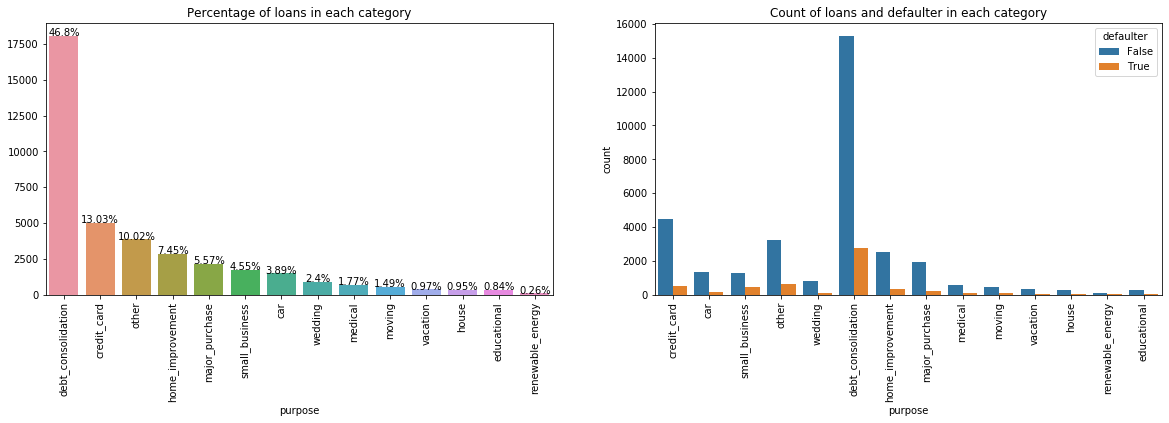

In [122]:
purpose_count = find_prcnt_within_category(df, 'purpose')

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('Percentage of loans in each category')
plt.xticks(rotation = 90)
plt_purpose = bar_plt_series(purpose_count)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="purpose", hue="defaulter", data=df)

plt.show()

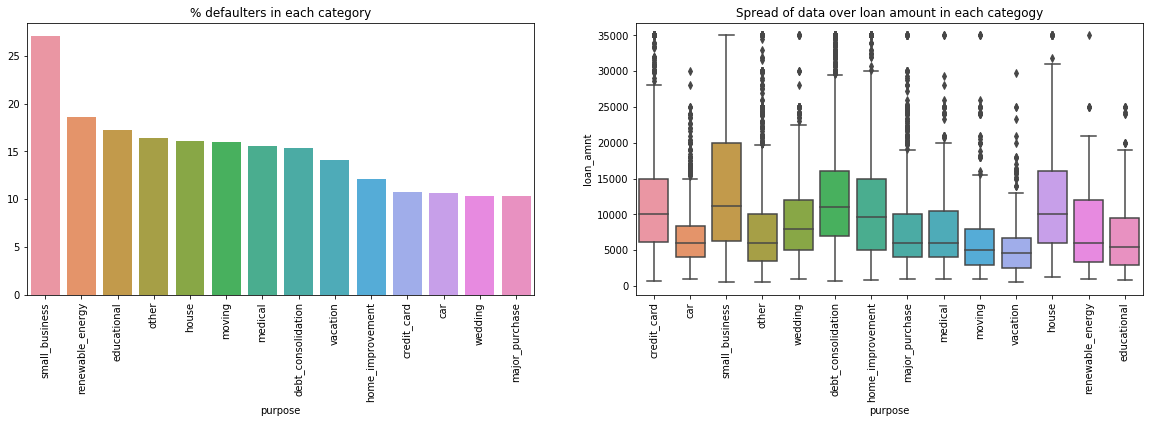

In [123]:

plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('% defaulters in each category')
plot_defaulter_percentage_graph(df, 'purpose', rotate_x_ticks = True, defaulter = True)

plt.subplot(122)
plt.title('Spread of data over loan amount in each categogy')
plt.xticks(rotation = 90)
sns.boxplot(x="purpose", y="loan_amnt", data=df)

### Observations (variable = purpose): 
###### Top 3 Purposes:
- Debt Consolidation (46.8% of total loans), Credit Card (13.03% of total loans), Other (10.02% of total loans)

###### Top 5 Purposes where loans are charged off
- Small Business (4.55% of total loans)
- Renewable Energy (0.26% of total loans
- Educational (0.84% of total loans)
- Other (10.02% of total loans)
- House (0.95% of total loans)

###### Inference
- Loans where purpose is Debt Consolidation and Credit Card are 70% of total with 13% chance of default
- Loans where purpose is Other are 10% with 17% chance of default
- Loans where purpose is Small Business are 4.55% with 27% chance of default
    - Also, box plot shows that higher amount of loans are more in this category
    - This is the driving factor
- Note
    - Loans where purpose if renewable energy, educational or house are small in numbers
    - But in future we should keep watch on such loans

## Address State

- Definition: The state provided by the borrower in the loan application
- Type - Categorical (Unordered)

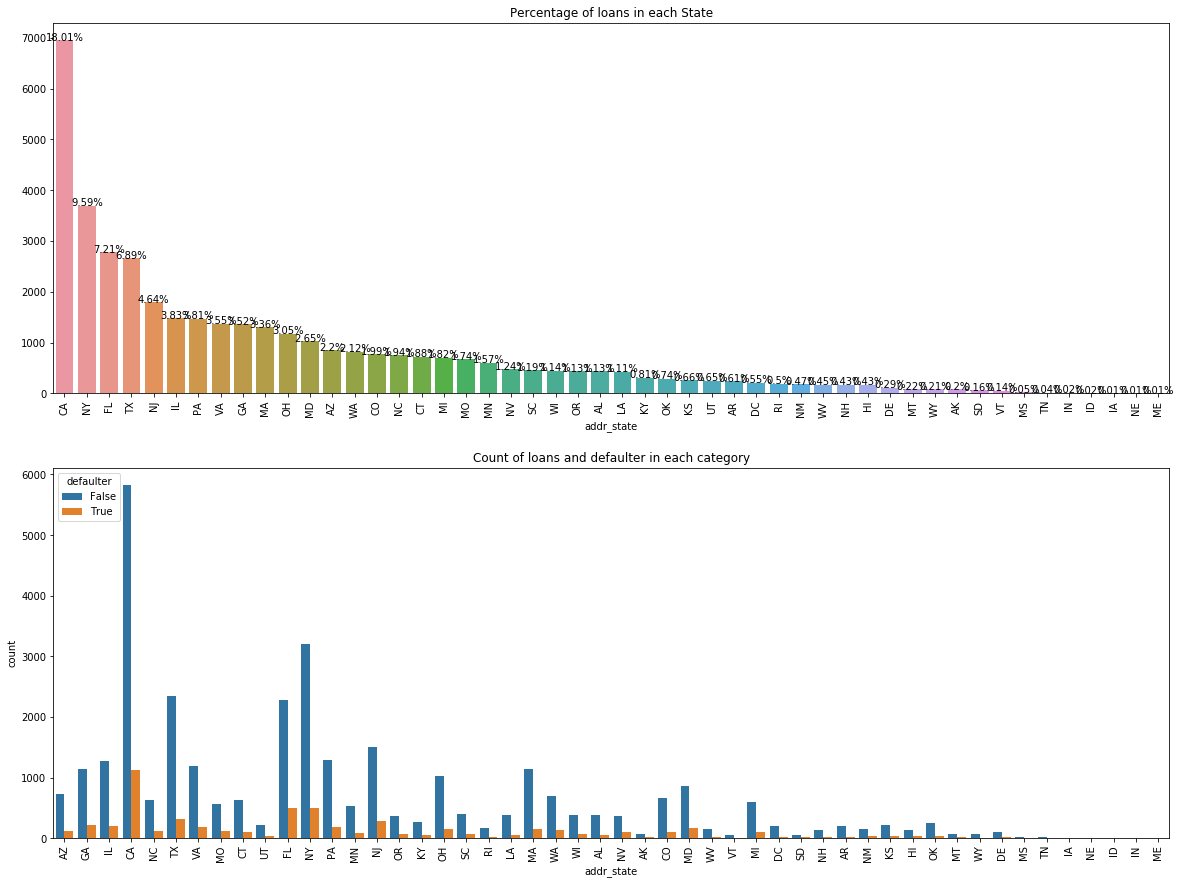

In [141]:
addr_state_count = find_prcnt_within_category(df, 'addr_state')

plt.figure(figsize = (20,15))
plt.subplot(211)
plt.title('Percentage of loans in each State')
plt.xticks(rotation = 90)
plt_purpose = bar_plt_series(addr_state_count)

plt.subplot(212)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="addr_state", hue="defaulter", data=df)

plt.show()

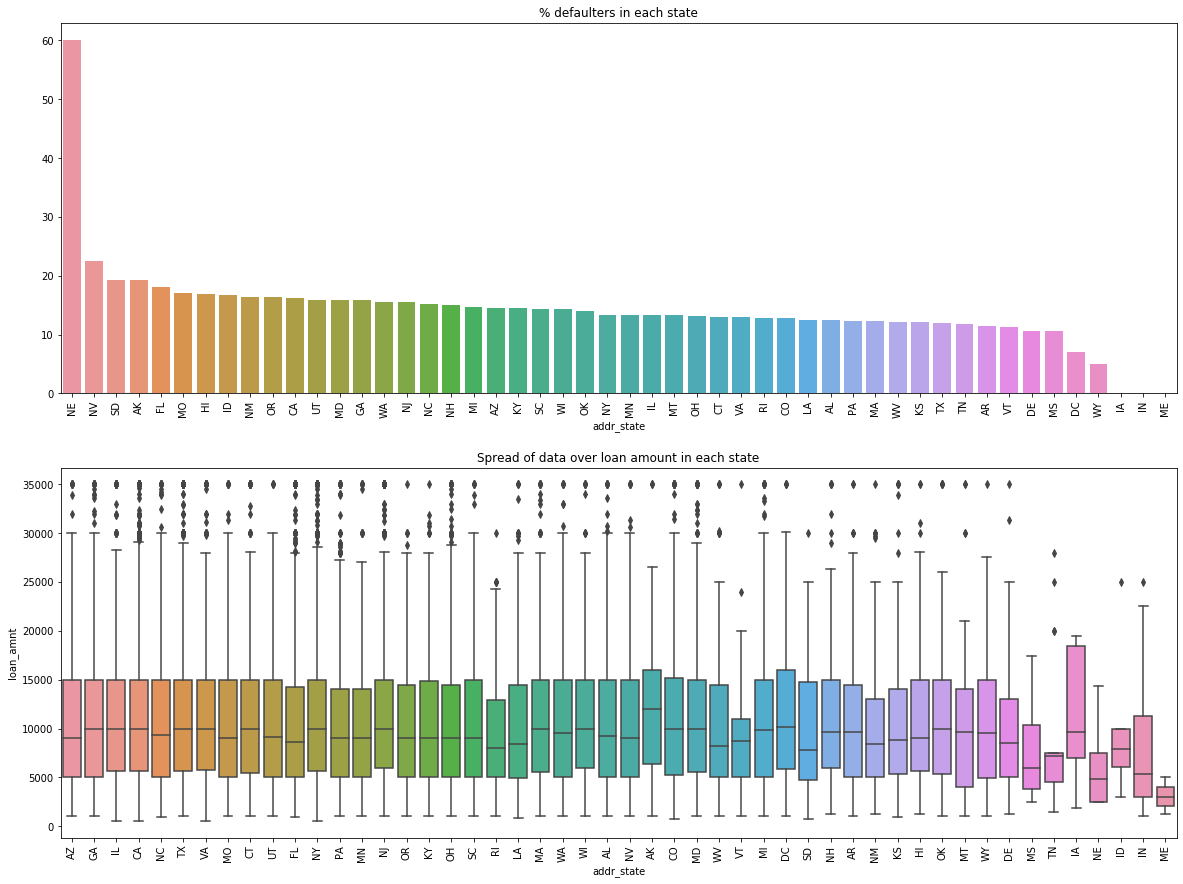

In [140]:
plt.figure(figsize = (20,15))
plt.subplot(211)
plt.title('% defaulters in each state')
plot_defaulter_percentage_graph(df, 'addr_state', rotate_x_ticks = True, defaulter = True)

plt.subplot(212)
plt.title('Spread of data over loan amount in each state')
plt.xticks(rotation = 90)
sns.boxplot(x="addr_state", y="loan_amnt", data=df)

plt.show()

### Observations (variable = addr_state_count): 

##### Metrics
- top 6 states are CA, NY, FL, TX, NJ, IL which contributes to 50% of the loans
- Median is almost same for each state so most of the loans are about $10000

##### Inferece
- Loans given to a person in NE (Nebraska) are most risky with 60% chance of defaulting
    - But the number of loans are very small in data. So we cannot say that this is the driving factor
- Loans given to person in NV (Nevada) are also risky with more than 20% chance of defaulting 
    - But the number of loans are very small in data. So we cannot say that this is the driving factor

## DTI
- Definition: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- Type: Continuous

In [157]:
# This is continous variable
print('Percentiles')
print(df.dti.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))
# we see a gradual increase, so no outliers

df.loc[:, 'dti_bucket'] = pd.cut(df.dti, [0,10,20,30], labels = ['Low', 'Medium', 'High'])
#lets create dti_buckets of 0-10, 10-20, 20-30

Percentiles
count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
5%           2.100000
10%          4.060000
25%          8.130000
50%         13.370000
75%         18.560000
90%         22.290000
95%         23.800000
99%         26.530000
max         29.990000
Name: dti, dtype: float64


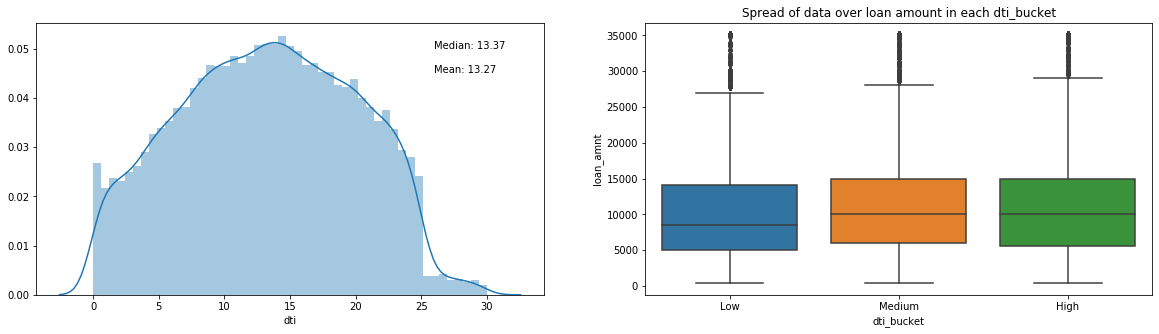

In [159]:
# Lets plot a distplot
plt.figure(figsize = (20, 5))
plt.subplot(121)
dti_plot = sns.distplot(df.dti)
dti_plot.text(26,0.050, 'Median: ' + str(df.dti.median()))
dti_plot.text(26,0.045, 'Mean: ' + str(round(df.dti.mean(), 2)))

plt.subplot(122)
plt.title('Spread of data over loan amount in each dti_bucket')
sns.boxplot(x="dti_bucket", y="loan_amnt", data=df)

plt.show()

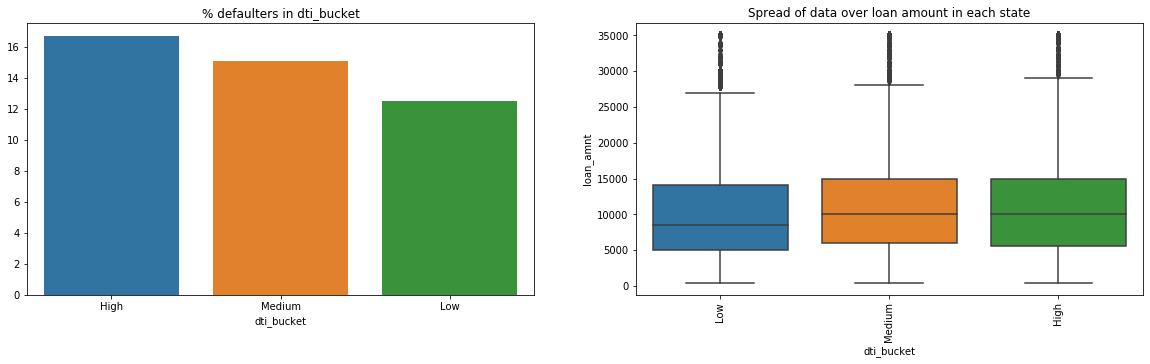

In [161]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title('% defaulters in dti_bucket')
plot_defaulter_percentage_graph(df, 'dti_bucket', rotate_x_ticks = False, defaulter = True)

plt.subplot(122)
plt.title('Spread of data over loan amount in each state')
plt.xticks(rotation = 90)
sns.boxplot(x="dti_bucket", y="loan_amnt", data=df)

plt.show()

### Observations (variable = dti): 
###### Metrics
- Data is evenly distributed
- With mean and median both very close(Mean = 13.32, Median = 13.4)

##### Analysis
- Most of the loans have debt to total income ratio of 13.3 (Mean)
    - Which means that 13.3 % of individual's monthly salary goes in paying debt
- There is a spike at 0 which indicates no or very minor current debt
- There is a drop at 25 which indicates that lending club rarely offers loan with dti > 25
- We see that with dti chances of defaulting increases gradually
    - In the High bucket (20-30) its 17%
- This is one of the driving factors of identifying defaulters

## Earliest Credit Line
- Definition: The month the borrower's earliest reported credit line was opened
- Type: Continuous

In [164]:
print(df.length_of_account.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

# looks like there are some outliers.
# 90% tile is 23, 95%tile is 27 and 99%tile is 36 which is a huge jump

count    38577.000000
mean        13.717837
std          6.840148
min          3.000000
5%           5.000000
10%          6.000000
25%          9.000000
50%         12.000000
75%         17.000000
90%         23.000000
95%         27.000000
99%         36.000000
max         65.000000
Name: length_of_account, dtype: float64


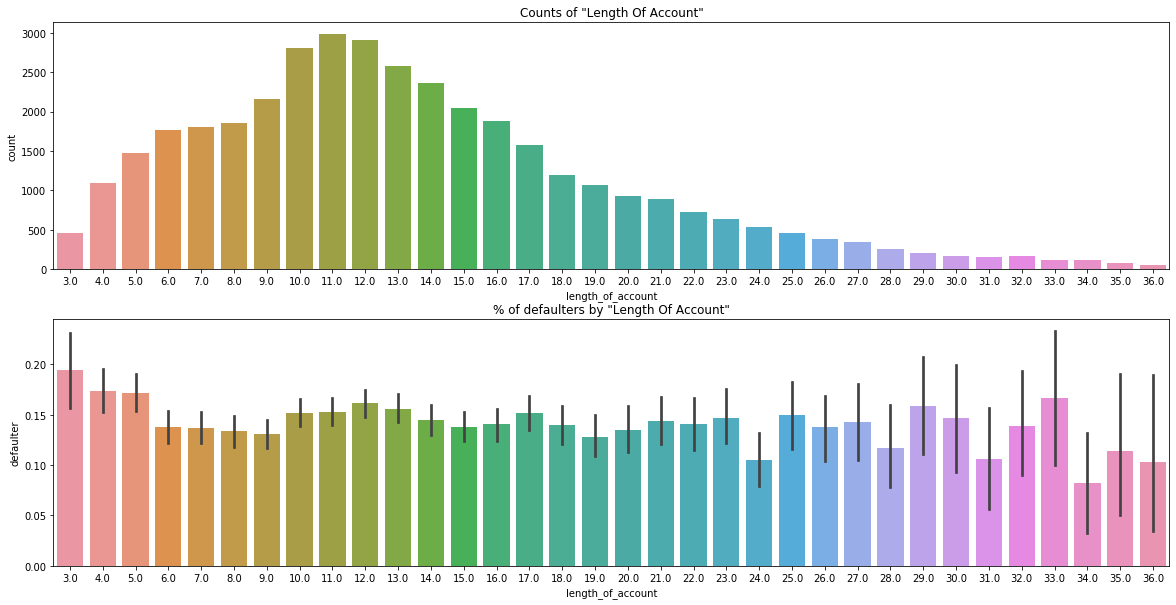

In [168]:
# lets plot a countplot by removing outliers
plt.figure(figsize = (20, 10))
plt.subplot(211)
plt.title('Counts of "Length Of Account"')
sns.countplot(x = "length_of_account", data = df[df.length_of_account <= 36])

plt.subplot(212)
plt.title('% of defaulters by "Length Of Account"')
sns.barplot(x="length_of_account", y="defaulter", data = df[df.length_of_account <= 36])
plt.show()

### Observations
###### Metrics
- Looks like a normal dist with some outliers after 36 years
- No peaks or trend in graph

##### Analysis
- This variable is NOT a driving factor to determine loan defaulters

# Inquiries in last 6 months
- Description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- Type: Categorical (ordered)

In [171]:
print(df.inq_last_6mths.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

# There are outliers after 4

count    38577.000000
mean         0.871737
std          1.071546
min          0.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
90%          2.000000
95%          3.000000
99%          4.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


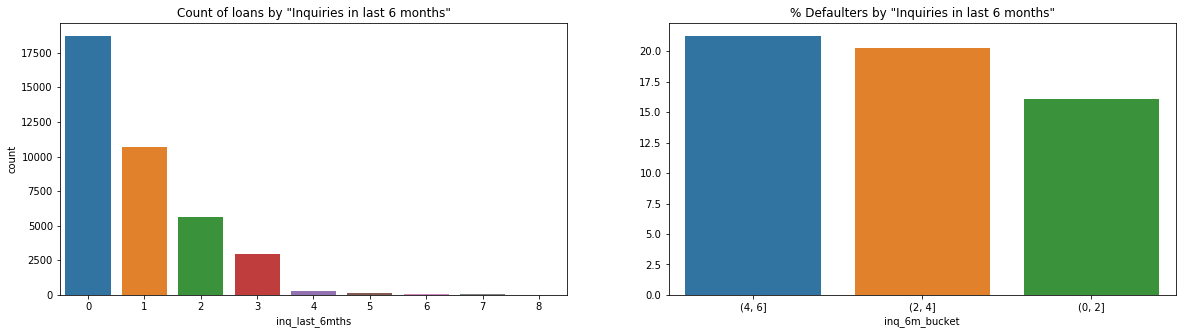

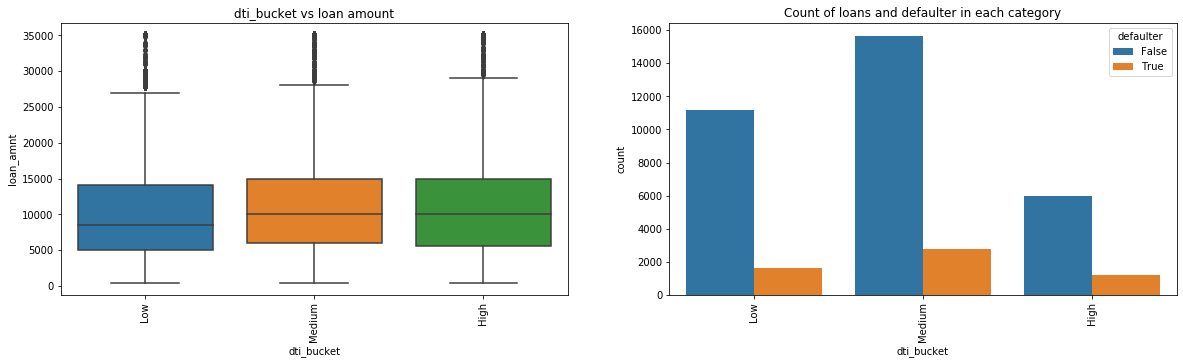

In [181]:
# Count plot of Inquiries in last 6 months
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Count of loans by "Inquiries in last 6 months"')
sns.countplot(x = "inq_last_6mths", data = df)

plt.subplot(122)
plt.title('% Defaulters by "Inquiries in last 6 months"')
plot_defaulter_percentage_graph(df, 'inq_6m_bucket', rotate_x_ticks = False, defaulter = True)

plt.show()

plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('dti_bucket vs loan amount')
plt.xticks(rotation = 90)
sns.boxplot(x="dti_bucket", y="loan_amnt", data=df)

plt.subplot(122)
plt.title('Count of loans and defaulter in each category')
plt.xticks(rotation = 90)
sns.countplot(x="dti_bucket", hue="defaulter", data=df)
plt.show()

### Observations:
###### Metrics
- Most of the people had 0 enquiries
    - The inquiry is done when user opens a new credit account(credit card or loan) or bank account
    - Having this number lower is better
- May be we can say that Lending club is more skeptical about people having 4 or more inquiries

##### Analysis
- % of defaulters gradually increases with increase in inquiries
- If number of inquiries in last 6 months is between 4 to 6 there is 20% chance of defaulting
- This is a driving factor for identifying defaulters

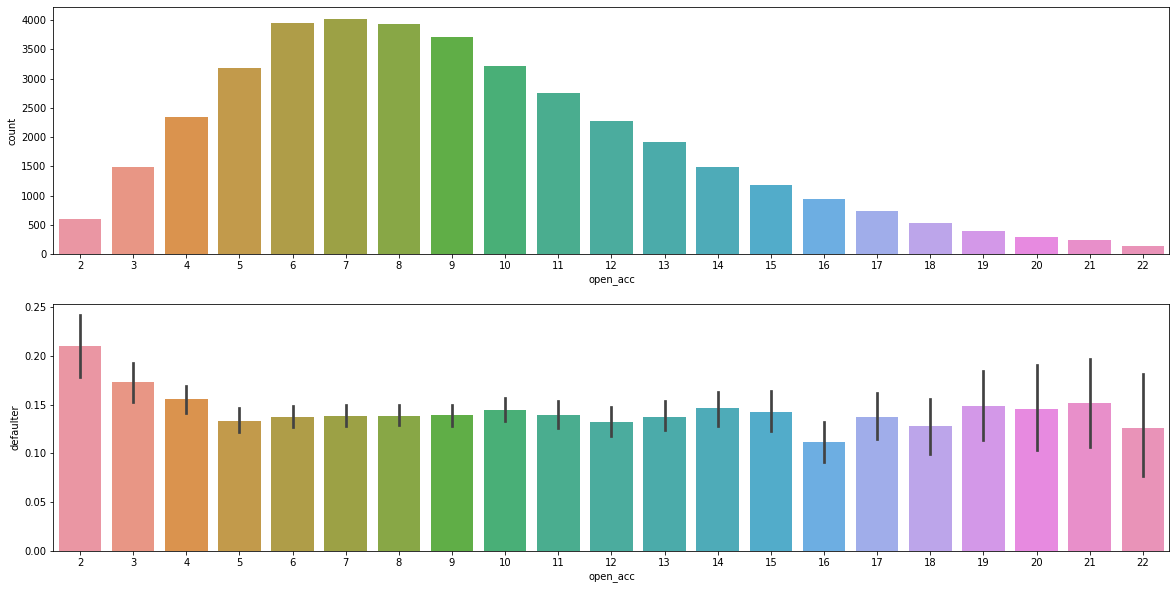

In [77]:
# open_acc

df.open_acc.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
# this column has some outliers
# 99%tile is 22. Filtering data at 99 and plotting

plt.figure(figsize = (20, 10))
plt.subplot(211)
sns.countplot(x = "open_acc", data = df[df.open_acc <= 22])

plt.subplot(212)
sns.barplot(x = "open_acc", y="defaulter", data = df[df.open_acc <= 22])

plt.show()

# We see that maximum people who got the loan had count of accounts between 6 and 10
# Number of account is indicator of how many other financial institutions has trusted this person
# having more number of accounts is a sign of a good borrower
# Lending club is a bit linient here though. We see in the chart that there are considerable people with 5 or less accounts

In [182]:
df.open_acc.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

df.open_acc.corr(df.total_acc)

0.6872599160028644

Mode:  16


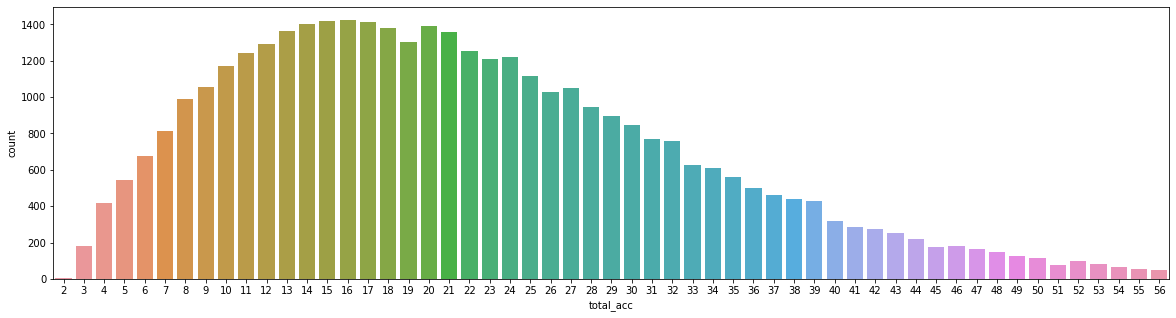

In [365]:
# open_acc	The number of open credit lines in the borrower's credit file.
# total_acc	The total number of credit lines currently in the borrower's credit file

# whats the diff in above 2

df.total_acc.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
# there are some outliers After 56

print('Mode: ', df.total_acc.mode().iloc[0])

plt.figure(figsize = (20, 5))
sns.countplot(x = "total_acc", data = df[df.total_acc <= 56])
plt.show()

# this is normally distributed column
# this is total number of accounts. So Mode would make more sense
# mode is 16

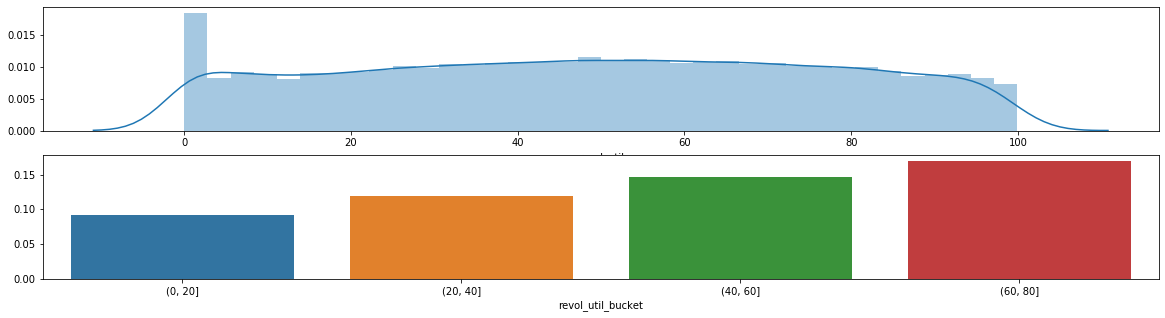

In [518]:
# revol_util
plt.figure(figsize = (20, 5))
plt.subplot(211)
sns.distplot(df[~df.revol_util.isnull()].revol_util)

df.loc[:, 'revol_util_bucket'] = pd.cut(df.revol_util, [0, 20, 40, 60, 80])

revol_util_percentage = (df.groupby('revol_util_bucket').defaulter.sum()/df.groupby('revol_util_bucket').id.count()).sort_values(ascending = False)

plt.subplot(212)
sns.barplot(x=revol_util_percentage.index, y=revol_util_percentage.values)
plt.show()

plt.show()

### Observations (variable = revol_util): 
###### Metrics
- Plot shows that at 0 we have a peak
    - This tells us that most of the people who got loan are not utilizing their credit line at all
    - This is also a sign of good or disciplined person
- There are some people who are utilizing upto 80 - 100% of their credit line.
- The graph shows us that may be the lending club is not using this variable before lending 

##### Analysis
- The graph shows that the number of defaulters increases with increase in revol_util
- So, as the revol_util increases, the chances of default increases

# Observations in Univariate and Segmented Univariate Analysis
- Following variables are found to be the driving factors for defaulters
1. Loan Amount
    - As the loan amount increases the chances of default increases
2. Term
    - Long term loans are more risky
3. Grade
    - Lower grade loans are riskier (e.g. G, F, E)
    - Almost 30% of G grade loans are defaulted
4. Annual Income
    - Almost 20% of loans were defaulted in the 0-10K and 10-20K category.
    - Almost 17.5% of loans were defaulted in the 20-30K and 30-40K category. In these categories, the number of loans issued was significantly higher in 30-40K category.
5. Purpose
    - Loans where purpose is Small Business are 4.55% with 27% chance of default
6. DTI
    - As DTI increases, chances of loan getting detaulted increases
7. Inquiries in last 6 months
    - % of defaulters gradually increases with increase in inquiries
    - If number of inquiries in last 6 months is between 4 to 6 there is 20% chance of defaulting
8. Revolving Utilization
    - As Revol util increases, chances of default increases

In [368]:
# Bi variate

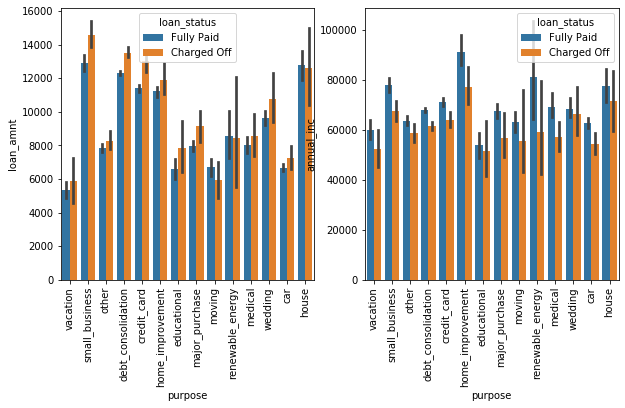

In [369]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.xticks(rotation = 90)
sns.barplot(x = 'purpose', y = 'loan_amnt', hue='loan_status', data = df.sort_values('loan_amnt'))

plt.subplot(122)
plt.xticks(rotation = 90)
sns.barplot(x = 'purpose', y = 'annual_inc', hue='loan_status', data = df.sort_values('loan_amnt'))
plt.show()
# the loan amounts are max in small_business and house. These are definitely risky loans
# loans in small_business are making maximum losses
# Credit_card being #2
# Debt Consolidation #3

# moving, renewable energy are mkaing profits

# other, medical, car are making no profit no loss

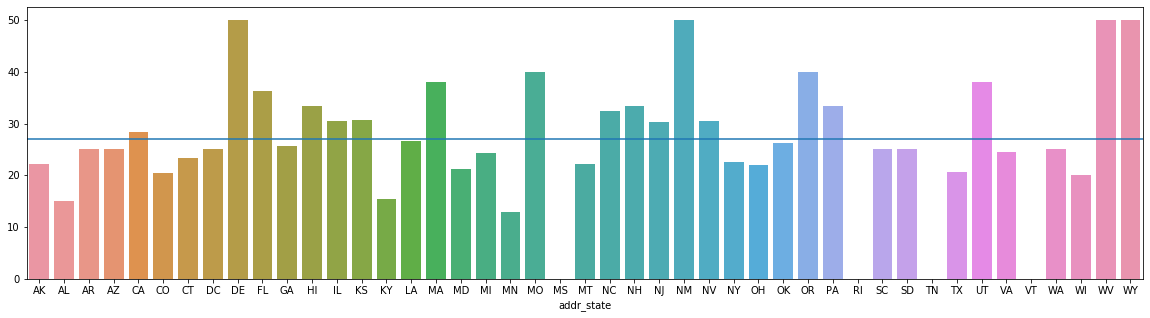

In [424]:
# round(df[ & (df.defaulter == True)].groupby('addr_state').id.count()/df.groupby('addr_state').id.count()*100, 2)
small_bus = df[df.purpose == 'small_business']
df_plot = round(small_bus[small_bus.defaulter == True].groupby('addr_state').id.count()/small_bus.groupby('addr_state').id.count()*100, 2)
plt.figure( figsize = (10,5))
plt.axhline(y = 27)
sns.barplot(x = df_plot.index, y = df_plot.values)

# Mostly true across all states
# some states like DE, NM, WV, WY are having spikes
# small business loans on AL, KY, MN are better

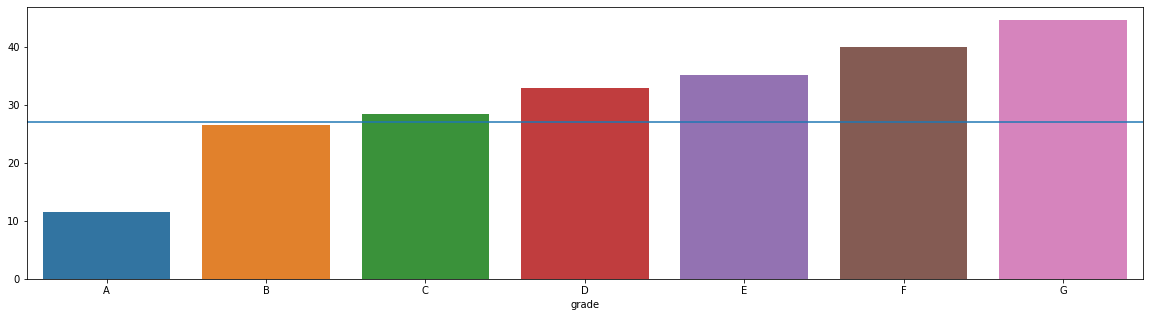

In [428]:
small_bus = df[df.purpose == 'small_business']
df_plot = round(small_bus[small_bus.defaulter == True].groupby('grade').id.count()/small_bus.groupby('grade').id.count()*100, 2)
plt.figure( figsize = (20,5))
plt.axhline(y = 27)
sns.barplot(x = df_plot.index, y = df_plot.values)

# A grade loans are better in small_business rest all are close to or more than 27% defaulters

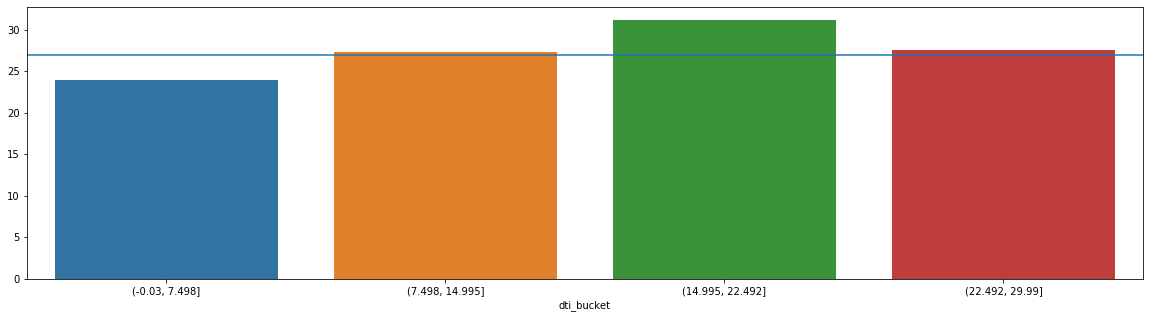

In [586]:
small_bus = df[df.purpose == 'small_business']
df_plot = round(small_bus[small_bus.defaulter == True].groupby('dti_bucket').id.count()/small_bus.groupby('dti_bucket').id.count()*100, 2)
plt.figure( figsize = (20,5))
plt.axhline(y = 27)
sns.barplot(x = df_plot.index, y = df_plot.values)

# No specific trend

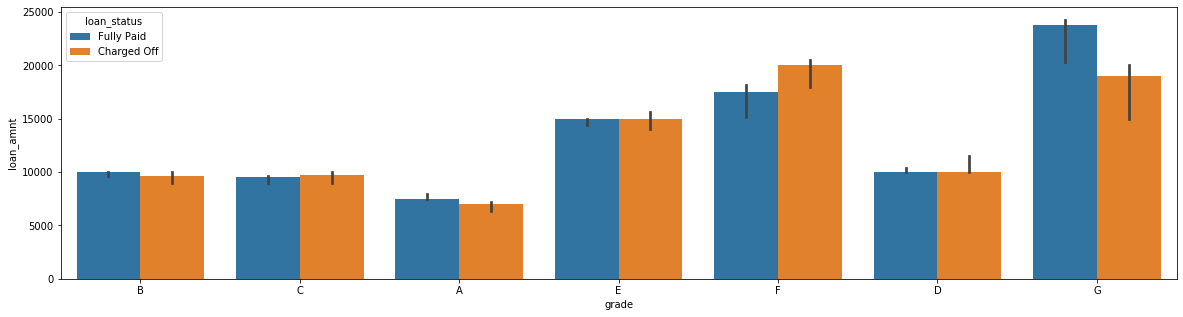

In [516]:
plt.figure(figsize = (20, 5))
# plt.xticks(rotation = 90)
sns.barplot(x = 'grade', y = 'loan_amnt', hue='loan_status', data = df, estimator = median)

# Loans given to G grade are making highest profits
# Loans given to F grade are making highest losses
# For other grades its no profit-no loss

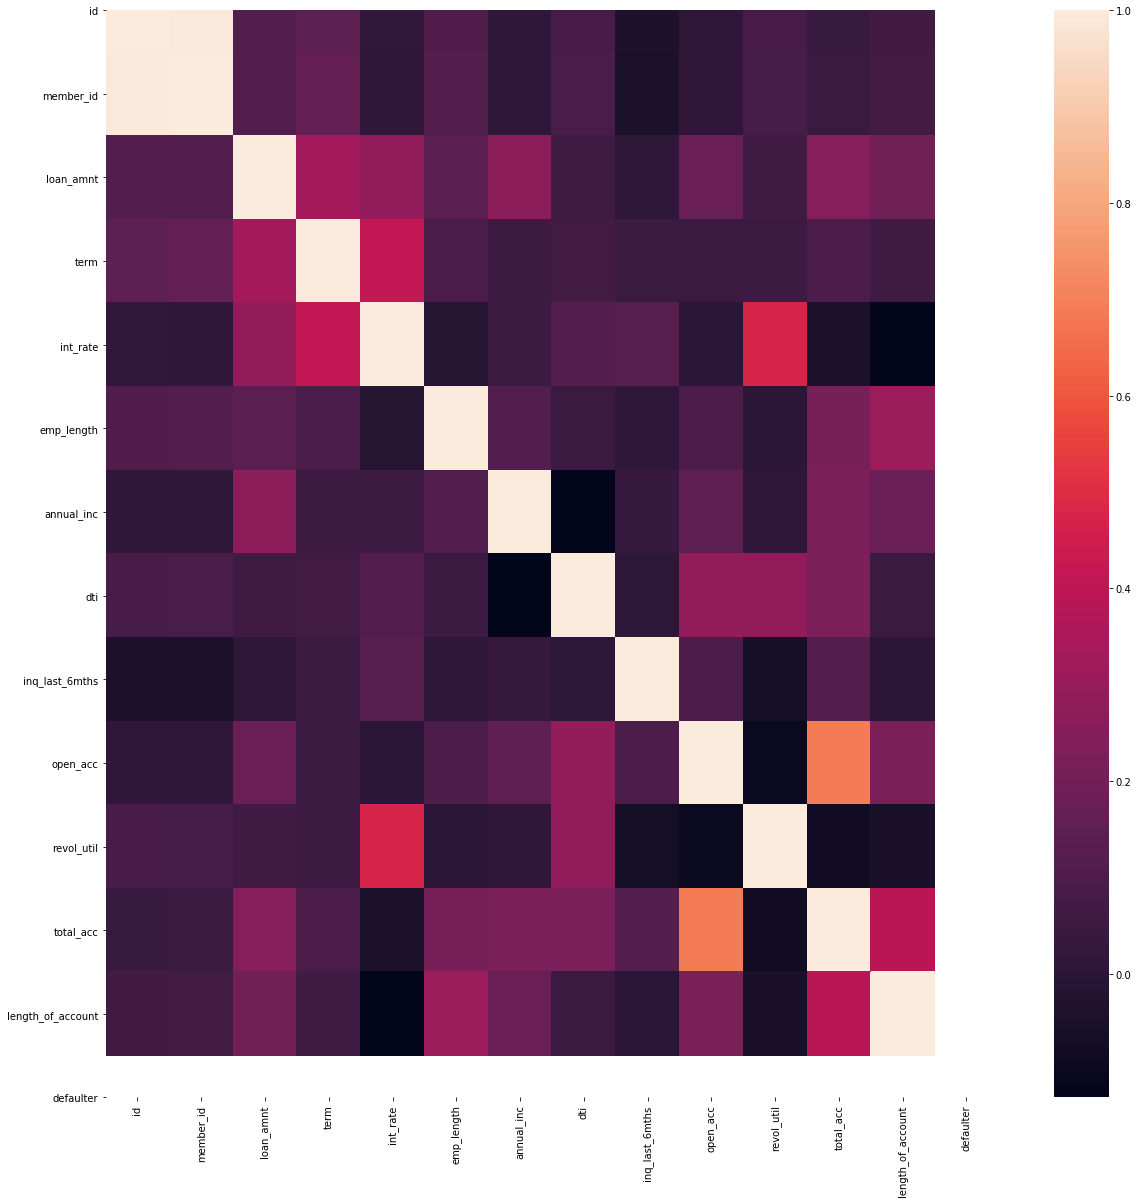

In [515]:
plt.figure(figsize = (20, 20))
sns.heatmap(df[df.defaulter == False].corr())

In [517]:
df.head()

,id,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,length_of_account,defaulter,purpose_consolidated,dti_bucket,inq_6m_bucket,revol_util_bucket
0,1077501,1296599,5000,36,10.65,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,3,83.7,9,27.0,False,debt_consolidation,"(22.492, 29.99]","(-0.008, 2.0]","(79.92, 99.9]"
1,1077430,1314167,2500,60,15.27,C,C4,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,3,9.4,4,13.0,True,personal,"(-0.03, 7.498]","(4.0, 6.0]","(-0.0999, 19.98]"
2,1077175,1313524,2400,36,15.96,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2,98.5,10,10.0,False,small_business,"(7.498, 14.995]","(-0.008, 2.0]","(79.92, 99.9]"
3,1076863,1277178,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,10,21.0,37,16.0,False,other,"(14.995, 22.492]","(-0.008, 2.0]","(19.98, 39.96]"
5,1075269,1311441,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,2004-11-01,3,9,28.3,12,7.0,False,personal,"(7.498, 14.995]","(2.0, 4.0]","(19.98, 39.96]"


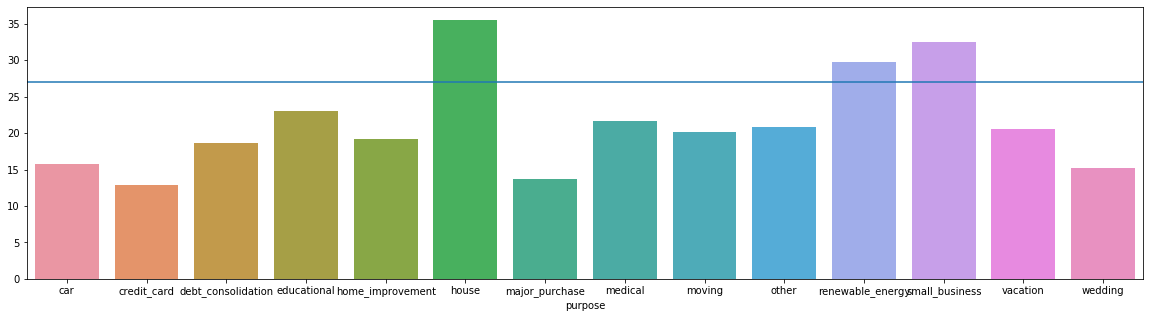

In [524]:
#  revol_util
revol_util_bivariate = df[df.revol_util > 60]
df_plot = round(revol_util_bivariate[revol_util_bivariate.defaulter == True].groupby('purpose').id.count()/revol_util_bivariate.groupby('purpose').id.count()*100, 2)
plt.figure( figsize = (20,5))
plt.axhline(y = 27)
sns.barplot(x = df_plot.index, y = df_plot.values)

# consistent across all purposes

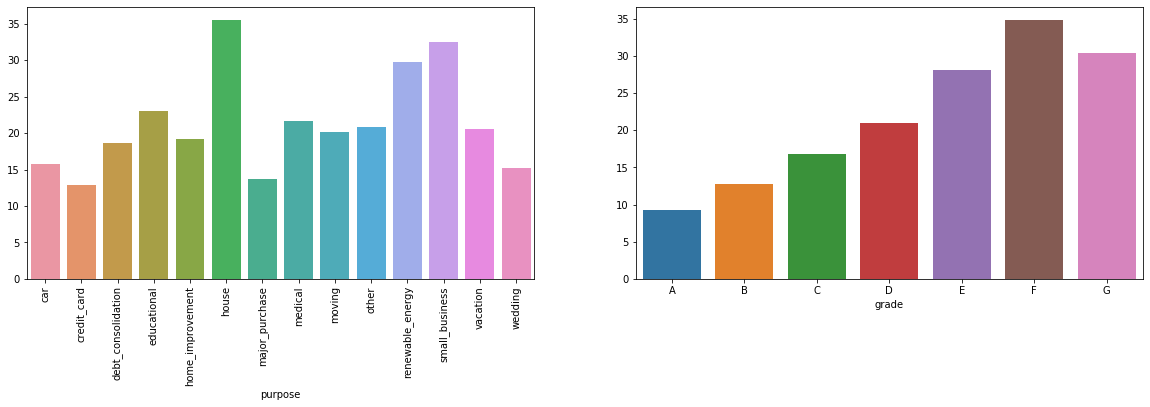

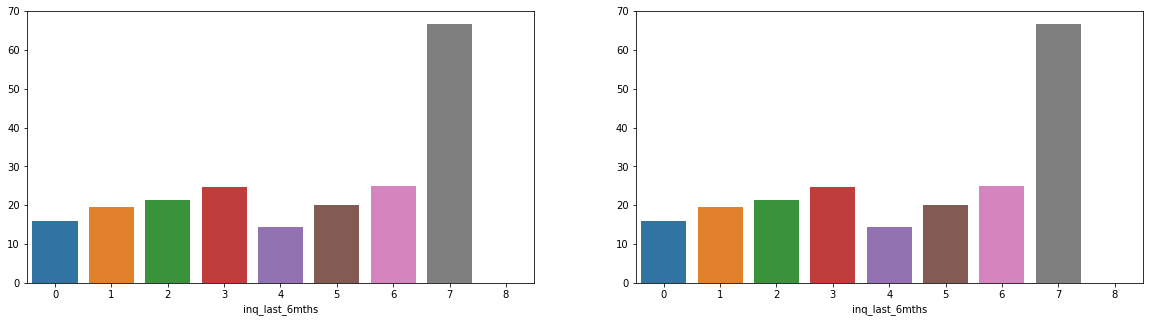

In [585]:
revol_util_bivariate = df[df.revol_util > 60]

plt.figure(figsize = (20, 5))
plot_percentage_graph(revol_util_bivariate, 'purpose', rotate_x_ticks = True, subplt = (121))
plot_percentage_graph(revol_util_bivariate, 'grade', rotate_x_ticks = False, subplt = (122))

plt.figure(figsize = (20, 5))
plot_percentage_graph(revol_util_bivariate, 'inq_last_6mths', rotate_x_ticks = False, subplt = (121))
plot_percentage_graph(revol_util_bivariate, 'inq_last_6mths', rotate_x_ticks = False, subplt = (122))

# If revol_util > 60 then Defaults are consistent across puposes
# gradually increases as Grade degrades
# When inq_last_6mths is 7 the chance of default increases to 70%



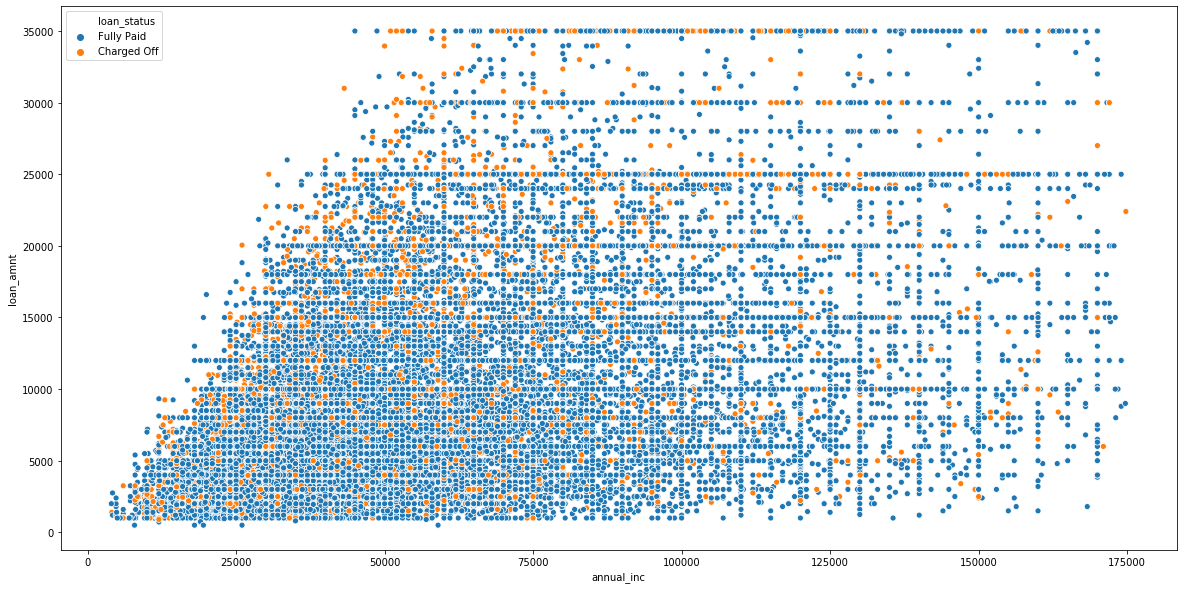

In [109]:
plt.figure(figsize = (20, 10))
sns.scatterplot(y="loan_amnt", x="annual_inc", hue="loan_status", data=df)